# 競馬データ取得プログラム(Python)

## はじめに
競馬の結果をAIを使用して予測するプログラムを作成しました。  
AIを作成するためには大量のデータが必要ですそのデータを取得するためには色々な方法がありますが  
その中でWebスクレイピングを使用して競馬過去のデータを取得していきました。  
今回は主にそのWebスクレイピングの技術について発表したいと思います。  
  

今回データを取得するサイト  
https://www.netkeiba.com/
  
  


  

# 1 クローリングとスクレイピングについて


## 1.1 クローリングとスクレイピングの定義

### クローリング 
Webページのハイパーリンクをたどって次々にWebページをダウンロードする作業。
### スクレイピング 
ダウンロードしたWebページから必要な情報を抜き出す作業。

## 1.2 クローリング・スクレイピングの方法
### プログラミング言語  
- python,PHP,java,C,Ruby
- シェルスクリプト(Unixコマンド)

### Webスクレイピングツール  
- ExcelやSpreadSheet  
- Octoparse   
- Scraper  

## 1.3 クローリング・スクレイピングでPythonを使うメリット
### 言語自体の特性  
読みやすく書きやすくPHP、Java、C / C ++と比べ、Pythonは最も簡単  
Pythonはプログラムを書いたらすぐに実行することができる対話型  
### 強力なライブラリの存在  
世界中の開発者が数多くのライブラリを公開しており、簡単に使うことができる  
lxmlやBeautifulSoupなど有名なスクレイピングライブラリがある。  
### スクレイピング後の処理との親和性  
データ分析においてもPythonには優秀なライブラリのpandasなどが揃っている
Pythonでは数値計算や科学技術計算の分野で古くからNumPyやSciPyといったライブラリが有名　　
  
## 1.4 今回紹介するライブラリ
### Beautiful Soup 
シンプルかつわかりやすいAPIでデータを抜き出せるのが特徴で、古くから人気のあるライブラリです。  
### Selenium   
ブラウザーを自動操作するためのライブラリです。  
Pythonの他にJavaやJavaScriptなど様々な言語に対応しています。  
WebDriverAPIを実装するドライバーを用意しており、これを経由して操作します。



# 2 Pythonの基礎知識
## 2.1 python実行方法
### インタラクティブシェル
pythonコマンドを引数なしで実行すると、インタラクティブシェルが起動します。  
pythonのコードを対話的に実行できるので、ライブラリの使い方の確認などに便利です。

### スクリプトファイル
pythonのスクリプトは.pyという拡張子のファイルに保存します。  
pythonコマンドにpyファイルのpathを引数として渡すとスクリプトファイルを実行されます。

### Jupyter Notebook
ノートブックと呼ばれる.ipynbという拡張子のファイルにプログラムや説明の文章、実行結果などをまとめて管理できるます。  
データ分析用のツールです。

In [242]:
# ソースコードを記述し、Shift+Enterで実行できます。
print("hello_world")

hello_world


このように、Jupyter Notebookでは、セルごとにソースコードを記述して、実行を行うことができます。  
実行結果はすぐ下に表示され、何度でも再実行できます。  
また、Jupyter Notebookでは、ノートブックにグラフを表示することもできます。

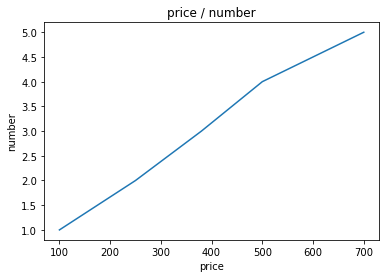

In [243]:
import matplotlib.pyplot as plt

price = [100, 250, 380, 500, 700]
number = [1, 2, 3, 4, 5]

# グラフを書く
plt.plot(price, number)

# グラフのタイトル
plt.title("price / number")

# x軸のラベル
plt.xlabel("price")

# y軸のラベル
plt.ylabel("number")

# 表示する
plt.show()

ソースコードと説明の文章、実行結果をまとめて保存しておくことができるので  
データ分析を試行錯誤しながら行うことがとても簡単に行うことができます。

## 2.2 python基本文法

### 2.2.1 データ構造 
Pythonでは数値、文字列、リスト、辞書などの基本的なデータ構造を手軽に扱えます。

#### 数値
整数と実数の基本的な四則演算が行えます。

In [244]:
a = 1
type(a) #整数はint型。type()関数でオブジェクトの型を確認

int

In [245]:
b = 3.14
type(b)#実数はfloat型。

float

In [246]:
print(1+1)

2


In [247]:
print(14/3)

4.666666666666667


In [248]:
print(14//3)

4


In [249]:
print(14%3)

2


#### 文字列
Unicode文字列を表すstr型とバイト列を表すbytes型があります。  
文字列操作は基本的にstr型で行い、ファイルやネットワーク越しのデータの読み書きなど  
Python以外との境界でbytes型に変換します。

In [250]:
type('abc')#文字列はstr型。文字列は'または"で囲う。

str

In [251]:
print('abc\n123')#\nは改行文字

abc
123


#### リスト 

複数の値の列をひとまとめに扱うためのデータ型としてリスト(list)があります。  

In [252]:
l = []
type(l) #[]でリスト（list型）を得る。

list

In [253]:
l = [1, 2, 3] #値はカンマで区切る。
print(l)

[1, 2, 3]


In [254]:
l = [1, 2, 'Three',4.0] #任意のオブジェクトを要素として含められる。
print(l)

[1, 2, 'Three', 4.0]


In [255]:
print(l[0])#[n]でn番目の要素を取得する。
print(l[2])

1
Three


In [256]:
print(l[1:3])

[2, 'Three']


In [257]:
print(len(l)) # len()関数でリストの長さを取得する。

4


In [258]:
l = l + [5,6]#+演算子でリスト同士を結合したリストを得る。
print(l)

[1, 2, 'Three', 4.0, 5, 6]


In [259]:
l.append(7)#append()メソッドで値を末尾に追加する。
print(l)

[1, 2, 'Three', 4.0, 5, 6, 7]


In [260]:
l.insert(1,1.5)#insert()メソッドで第1引数のインデックスに第2引数の値を挿入する。
print(l)

[1, 1.5, 2, 'Three', 4.0, 5, 6, 7]


In [261]:
del l[1]#del文で指定したインデックスの要素を削除する。
print(l)

[1, 2, 'Three', 4.0, 5, 6, 7]


In [262]:
l.pop(0)#pop()で指定したインデックスの要素を取得し、リストから削除する。

1

In [263]:
print(l)

[2, 'Three', 4.0, 5, 6, 7]


In [264]:
s = 'a,b,c'
l = s.split(',')#,で区切りそれぞれリストに入れる
print(l)

['a', 'b', 'c']


In [265]:
s = 'STR'.join(['a','b','c'])#str型のjoin()メソッドでリストを結合した文字列を得る。
print(s)

aSTRbSTRc


### 2.2.2 制御構造と関数・クラス定義

Pythonではインデントが大きな意味を持ちます。  
Pythonでは読みにくくなることを避けるため  
正しくインデントされていないブロックがあるとIndentationErrorというエラーになり実行できません。  
インデントを増やす直前の行の末尾には:（コロン）を置きます  
制御構造文と関数・クラス定義を書く際に必要になってきます。


#### if文

In [266]:
a = 21 # if 文 で 処理 を 分岐 できる。 
if a == 1:
    print('aは1') # if 文 の 式 が 真 の とき に 実行 さ れる。
elif a == 2:
    print('aは2') # elif 節 の 式 が 真 の とき に 実行 さ れる（ elif 節 は なく ても 良い）。 
else:
print('aは1でも2でもない') # どの 条件 にも 当てはまら なかっ た とき に 実行 さ れる（ else 節 は なく ても 良い

IndentationError: expected an indented block (<ipython-input-266-0d00f1845990>, line 7)

![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/1.png?raw=true)

#### for文とwhile文による繰り返し処理

In [267]:
for i in range(10):#回数を指定した繰り返しには組み込み関数range()を使う。
    print(i)

0
1
2
3
4
5
6
7
8
9


In [268]:
#変数iにinの右側のリストの要素が順に代入されて、ブロック内の処理が計7回実行される。
l = [1, 2, 'Three', 4.0, 5, 6, 7]
for i in l:
    print(i)

1
2
Three
4.0
5
6
7


In [269]:
i = 1
while i<10:#while文で式が真の間繰り返し処理する。
    print(i)
    i+=1

1
2
3
4
5
6
7
8
9


#### 関数定義

In [270]:
#addという名前の関数を定義する。この関数はaとbの2つの引数を取り、加算した値を返す。 
def add(a,b):
    return a + b #return文で関数の戻り値を返す。 

In [271]:
a = add(1,2)#関数の呼び出しは、関数名の後に括弧で引数を指定する。
print(a)#3と表示される。 

3


#### クラス定義

In [272]:
#Squareという名前のクラスを定義する。 
class Square:
    #インスタンスが作成された直後に呼び出される特殊なメソッドを定義する(コンストラクタ)
    def __init__(self, width, height):
        self.width = width # width 属性 に 値 を 格納 する
        self.height = height # height 属性 に 値 を 格納 する。
    # 面積 を 計算 する メソッド を 定義 する。 
    def area(self):
        return self.width*self.height

In [273]:
square=Square(100,20)#クラスのインスタンスを作成する。newなどのキーワードは不要。
print(square.width) 
print(square.area())

100
2000


#### 組み込み関数  

Pythonにはいくつかの組み込み関数が存在し、特に宣言せずに使えます。  
これまでに使ったprint()関数やlen()関数も組み込み関数です。  

#### 代表的な組み込み関数
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/2.png?raw=true)

#### モジュール  
Pythonには豊富な標準ライブラリが付属しています。Pythonのライブラリはモジュールと呼ばれる単位で管理されます  
モジュールには複数のクラスや関数が含まれます。  
  
  
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/3.png?raw=true)

#### ライブラリインストール

PyPIで公開されているライブラリのインストールにはpipというツールを使用します
  
pip install ライブラリ 名 でインストールできます



In [274]:
!pip install requests

# 3 スクレピング・クローリング実践 

## 3.1 スクレピング・クローリング注意事項
### 3.1.1 著作権について
著作物は著作権法によって保護されます。著作権法第2条では  
著作物の要件が「思想又は感情を創作的に表現したものであつて  
文芸、学術、美術又は音楽の範囲に属するもの」と定められています。  
Webページは基本的に著作物であると考えられるます。  
#### スクレピング・クローリングにおいて注意が特に必要な権利
- 複製権：収集したWebページを保存する権利
- 翻案権：収集したWebページから新たな著作物を創造する権利
- 公衆送信権：収集したWebページをサーバーから公開する権利  
  　 
これらの行為には基本的に著作権者の許諾が必要ですが、  
使用目的によっては著作権者の許諾なく自由に行うことが認められています。  
情報解析を目的とした複製や検索エンジンサービスの提供を目的とした複製・翻案・自動公衆送信が、  
著作権者の許諾なく行えるようになっています  

#### 利用についての一定の条件
- 会員のみが閲覧可能なサイトのクロールには著作権者の許諾が必要なこと
- robots.txtやrobotsmetaタグで拒否されているページをクロールしないこと
- クロールした後に拒否されたことがわかった場合は保存済みの著作物を消去すること
- 検索結果では元のWebページにリンクすること検索結果として表示する著作物は必要と認められる限度内であること
- 違法コンテンツであることを知った場合は公衆送信をやめること

### 3.1.2 サーバーの負荷
クローラーを実行する際には、クロール先のWebサイトの負荷を考慮する必要があります。  
クローラーがWebサーバーの処理能力の多くを占めてしまうと、  
他の人がそのWebサイトを閲覧できなくなってしまいます。  
商用サイトの場合は、業務妨害となる可能性もあります。
#### 同時接続数
1つのWebサーバーが同時に処理できる接続数は限られているので、  
同時接続数を増やすと、それだけあなたのクローラーがWebサーバーの処理能力を専有してしまいます。  
出来るだけ数を少なくし処理が終わったら接続を切るようにする。

#### リクエスト間隔
間隔を空けずに次々とWebページを取得すると相手のサーバーに負荷をかけます。  
常識的なクロールの間隔1秒以上を入れることが望ましいと考えられています。
### 3.1.3　robots.txtによる指示
robots.txtはWebサイトのトップディレクトリに配置されるテキストファイルです。  
例えば、https://www.python.org/ のrobots.txt は https://www.python.org/robots.txt に置かれます。  
robots.txtの中身はRobotsExclusionProtocolとして標準化されており、  
GoogleやBingなど主要な検索エンジンのクローラーはこの標準に従っていると表明しています。  
robots.txtが存在しない場合は、すべてのページのクロールが許可されているとみなします。
#### robots.txtのパース  
Pythonの標準ライブラリのurllib.robotparserにはrobots.txtをパースするためのRobotFileParserクラスが含まれています。次のようにrobots.txtを簡単に扱えます。


In [275]:
from urllib.robotparser import RobotFileParser

rp = RobotFileParser()
rp.set_url('https://www.netkeiba.com/robots.txt')#set_url()でrobots.txtのURLを設定する。
rp.read()# read() で robots. txt を 読み込む。 

In [276]:
print(rp.crawl_delay('*'))#クロール間隔表す。

None


数値またはNoneが返される  
返された値が数値ならばその秒数分間隔をあけなければならない  
今回はNoneであるのでクロール間隔についての指示はない

In [277]:
#そのURLのクロールが許可されているかどうかを取得できる。
print(rp.can_fetch('*',"https://db.netkeiba.com/horse/2017101835/"))

True


True または Falseが返されます  
Trueならばクロールが許可されている  
Falseならばクロールは許可されていません

## 3.2 スクレピング・クローリングでデータを取得

### 3.2.1 RequestsによるWebページの取得
Webページを取得するには、ライブラリのRequestsを使います。  
HTTPヘッダーの追加やBasic認証など面倒な処理もRequestsには簡単に使えるインターフェイスが用意されています。 

In [278]:
!pip install requests

In [279]:
import requests#ライブラリをインポートして利用可能にする。

In [280]:
response = requests.get('https://db.netkeiba.com/race/202006030811.html')#get()関数でWebページを取得できる。

In [281]:
print(type(response))#get()関数の戻り値はResponseオブジェクト。

<class 'requests.models.Response'>


In [282]:
print(response.status_code)#status_code属性でHTTPステータスコードを取得できる。

200


In [283]:
print(response.headers['content-type'])#headers属性でHTTPヘッダーの辞書を取得できる。

text/html


In [284]:
print(response.encoding)#encoding属性でHTTPヘッダーから得られたエンコーディングを取得できる。

ISO-8859-1


In [285]:
response.text#text属性でstr型にデコードしたレスポンスボディを取得できる。
#表示結果は文字化けしている

017101833/" title="¥\xad¥á¥é¥ô¥§¥ê¥Æ" id="umalink_202006030811">¥\xad¥á¥é¥ô¥§¥ê¥Æ</a>\n\n</td>\n<td class="txt_c" nowrap="nowrap">²´3</td>\n<td class="txt_c" nowrap="nowrap">57</td>\n<td class="txt_l" nowrap="nowrap">\n<a href="/jockey/01116/" title="Æ£²¬¹¯ÂÀ">Æ£²¬¹¯ÂÀ</a>\n\n</td>\n<td class="txt_r" nowrap="nowrap">2:02.6</td>\n<td class="txt_c" nowrap="nowrap">¥¯¥Ó</td>\n\n<diary_snap_cut>\n<td class="speed_index bml" nowrap="nowrap">\n<div class="txt_c">\n<a href="https://www.netkeiba.com/premium/?service=p13" id="a_monthly_goods_link_01" data-theme="07003">**</a>\n</div>\n\n</td>\n<td nowrap="nowrap">1-1-1-1</td>\n<td class="bml" class="txt_c" nowrap="nowrap"><span>37.7</span></td>\n</diary_snap_cut>\n<td class="txt_r" nowrap="nowrap">63.5</td>\n<td class="bml" align="right" nowrap="nowrap"><span>10</span></td>\n<td nowrap="nowrap">538(0)</td>\n<diary_snap_cut>\n<td class="txt_c" nowrap="nowrap">\n<a href="/?pid=horse_training&id=2017101833&rid=202006030811"><img src="/style/netkei

In [286]:
response.encoding = response.apparent_encoding #エンコードを変更

In [287]:
response.text

11"><img src="/style/netkeiba.ja/image/ico_oikiri.gif" width="13" height="13" border="0" /></a>\n</td>\n<td class="txt_c" nowrap="nowrap">\n<a href="/?pid=horse_comment&id=2017101299&rid=202006030811"><img src="/style/netkeiba.ja/image/ico_comment.gif" width="13" height="13" border="0" /></a>\n</td>\n<td nowrap="nowrap">\n<div class="txt_c">\n<a href="https://www.netkeiba.com/premium/?service=p13" id="a_monthly_goods_link_02" data-theme="07004"><img src="/style/netkeiba.ja/image/ico_remarks.gif" width="13" height="13" border="0" /></a>\n</div>\n\n</td>\n</diary_snap_cut>\n<td class="txt_l" nowrap="nowrap">\n[東]\n<a href="/trainer/01134/" title="高橋文雅">高橋文雅</a>\n\n</td>\n<diary_snap_cut>\n<td class="txt_l w6ml" nowrap="nowrap">\n<a href="/owner/548009/" title="岡田勇">岡田勇</a>\n\n</td>\n<td class="txt_r" nowrap="nowrap"></td>\n</diary_snap_cut>\n</tr><tr>\n<td class="txt_r" nowrap="nowrap">17</td>\n<td class="w7ml" align="right" nowrap="nowrap"><span>7</span></td>\n<td class="txt_r" nowrap="

### 3.2.2 BeautifulSoupによるスクレイピング
#### 基本文法

In [288]:
!pip install beautifulsoup4

In [289]:
from bs4 import BeautifulSoup #bs4モジュールからBeautifulSoupクラスをインポートする。 
soup = BeautifulSoup(response.text, 'html.parser')# 

In [290]:
soup

owrap="nowrap">57</td>
<td class="txt_l" nowrap="nowrap">
<a href="/jockey/00733/" title="吉田豊">吉田豊</a>
</td>
<td class="txt_r" nowrap="nowrap">2:02.5</td>
<td class="txt_c" nowrap="nowrap">3/4</td>
<diary_snap_cut>
<td class="speed_index bml" nowrap="nowrap">
<div class="txt_c">
<a data-theme="07003" href="https://www.netkeiba.com/premium/?service=p13" id="a_monthly_goods_link_01">**</a>
</div>
</td>
<td nowrap="nowrap">17-16-15-13</td>
<td class="txt_c" nowrap="nowrap"><span>36.4</span></td>
</diary_snap_cut>
<td class="txt_r" nowrap="nowrap">14.6</td>
<td align="right" class="bml" nowrap="nowrap"><span>5</span></td>
<td nowrap="nowrap">474(-2)</td>
<diary_snap_cut>
<td class="txt_c" nowrap="nowrap">
<a href="/?pid=horse_training&amp;id=2017101299&amp;rid=202006030811"><img border="0" height="13" src="/style/netkeiba.ja/image/ico_oikiri.gif" width="13"/></a>
</td>
<td class="txt_c" nowrap="nowrap">
<a href="/?pid=horse_comment&amp;id=2017101299&amp;rid=202006030811"><img border="0" he

In [291]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [292]:
soup.find("a")#タグ名の属性でa要素を取得できる。一番先頭のタグのみ

<a href="http://www.netkeiba.com/?pid=go_sp" title="スマートフォン版へ"><img alt="スマートフォン版へ" class="imgover" src="https://cdn.netkeiba.com/img.www/style/netkeiba.ja/image/sp_nk_link_02.png"/></a>

In [293]:
print(type(soup.find("a")))#要素はTagオブジェクト。

<class 'bs4.element.Tag'>


In [294]:
soup.find_all("a")#aタグのすべての要素を取得できます

"/race/202006030807/" title="R">7R</a>,
 <a href="/race/202006030808/" title="R">8R</a>,
 <a href="/race/202006030809/" title="R">9R</a>,
 <a href="/race/202006030810/" title="R">10R</a>,
 <a class="active" href="/race/202006030811/" title="R">11R</a>,
 <a href="/race/202006030812/" title="R">12R</a>,
 <a href="/race/sum/06/20200419/">一覧</a>,
 <a href="/race/pay/06/20200419/" title="の払戻一覧">払戻し</a>,
 <a href="/?pid=race_list&amp;word=%BB%A9%B7%EE%BE%DE&amp;front=1">過去の皐月賞</a>,
 <a href="/race/movie/202006030811"><img alt="レース映像" class="imgover" src="https://cdn.netkeiba.com/img.db//style/netkeiba.ja/image/race_btn_movie_on.png"/></a>,
 <a class="active" href="https://db.netkeiba.com/race/202006030811/">結果/払戻</a>,
 <a href="https://db.netkeiba.com//?pid=race_board&amp;thread=race&amp;id=202006030811">掲示板</a>,
 <a href="/horse/2017101835/" id="umalink_202006030811" title="コントレイル">コントレイル</a>,
 <a href="/jockey/01014/" title="福永祐一">福永祐一</a>,
 <a data-theme="07003" href="https://www.netkeiba

In [295]:
print(type(soup.find_all("a")))

<class 'bs4.element.ResultSet'>


In [296]:
rs = soup.find_all("a")
#list型と同様に扱えます
print(len(rs))
print(rs[0])


240
<a href="http://www.netkeiba.com/?pid=go_sp" title="スマートフォン版へ"><img alt="スマートフォン版へ" class="imgover" src="https://cdn.netkeiba.com/img.www/style/netkeiba.ja/image/sp_nk_link_02.png"/></a>


In [297]:
soup.find("a").name#Tagオブジェクトのname属性でタグ名を取得できる。 

'a'

In [298]:
soup.find("a").contents#contents属性で子要素のリストを取得できる。

[<img alt="スマートフォン版へ" class="imgover" src="https://cdn.netkeiba.com/img.www/style/netkeiba.ja/image/sp_nk_link_02.png"/>]

In [299]:
soup.find("div", class_="data_intro")#キーワード引数でclassなどの属性を指定できる。classは予約語なのでclass_を使うこと

<div class="data_intro">
<dl class="racedata fc">
<dt>
11 R
</dt>
<dd>
<h1>第80回皐月賞(G1)<!--img src="style/netkeiba.ja/image/race_grade_g2_01.png" alt=""--></h1>
<p>
<diary_snap_cut>
<span>芝右2000m / 天候 : 晴 / 芝 : 稍重 / 発走 : 15:40</span><br/>
<diary_snap_cut>
<a href="/?pid=race_list&amp;word=%BB%A9%B7%EE%BE%DE&amp;front=1">過去の皐月賞</a>
</diary_snap_cut>
</diary_snap_cut></p>
</dd>
</dl>
<p class="smalltxt">2020年4月19日 3回中山8日目 3歳オープン  (国際) 牡・牝(指)(定量)</p>
<diary_snap_cut>
<ul class="btn_link_list fc">
<li class="race_btn_MOVIE end">
<a href="/race/movie/202006030811"><img alt="レース映像" class="imgover" src="https://cdn.netkeiba.com/img.db//style/netkeiba.ja/image/race_btn_movie_on.png"/></a>
</li>
</ul>
</diary_snap_cut>
</div>

In [300]:
soup.find("div", class_="data_intro").get_text()#text属性で要素内のすべての文字列を結合した文字列を取得できる。

'\n\n\n11 R\n\n\n第80回皐月賞(G1)\n\n\n芝右2000m\xa0/\xa0天候 : 晴\xa0/\xa0芝 : 稍重\xa0/\xa0発走 : 15:40\n\n過去の皐月賞\n\n\n\n\n2020年4月19日 3回中山8日目 3歳オープン\xa0\xa0(国際) 牡・牝(指)(定量)\n\n\n\n\n\n\n\n'

In [301]:
print(type(soup.find("div", class_="data_intro").get_text()))

<class 'str'>


#### 目的の値をスクレイピングするまでの流れ  
  
  
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/4.png?raw=true)
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/5.png?raw=true)
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/6.png?raw=true)
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/7.png?raw=true)
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/8.png?raw=true)
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/9.png?raw=true)

目的の数値はclass属性が"race_table_01 nk_tb_common"のtableタグで囲まれた二番目のtrタグのにあります  
更にそのtrタグのに囲まれた１番目のaタグのにあります

In [302]:
response = requests.get('https://db.netkeiba.com/race/202006030811.html')
response.encoding = response.apparent_encoding 
html = response.text
soup = BeautifulSoup(html, 'html.parser')# 

In [303]:
soup_table = soup.find("table", class_="race_table_01 nk_tb_common")#class属性が"race_table_01 nk_tb_common"のtableタグ取得
soup_table 

="/trainer/01111/" title="鈴木孝志">鈴木孝志</a>
</td>
<diary_snap_cut>
<td class="txt_l w2ml" nowrap="nowrap">
<a href="/owner/948006/" title="前田幸治">前田幸治</a>
</td>
<td class="txt_r" nowrap="nowrap"></td>
</diary_snap_cut>
</tr><tr>
<td class="txt_r" nowrap="nowrap">8</td>
<td align="right" class="w8ml" nowrap="nowrap"><span>8</span></td>
<td class="txt_r" nowrap="nowrap">17</td>
<td class="txt_l" nowrap="nowrap">
<a href="/horse/2017105567/" id="umalink_202006030811" title="ヴェルトライゼンデ">ヴェルトライゼンデ</a>
</td>
<td class="txt_c" nowrap="nowrap">牡3</td>
<td class="txt_c" nowrap="nowrap">57</td>
<td class="txt_l" nowrap="nowrap">
<a href="/jockey/01032/" title="池添謙一">池添謙一</a>
</td>
<td class="txt_r" nowrap="nowrap">2:01.9</td>
<td class="txt_c" nowrap="nowrap">ハナ</td>
<diary_snap_cut>
<td class="speed_index bml" nowrap="nowrap">
<div class="txt_c">
<a data-theme="07003" href="https://www.netkeiba.com/premium/?service=p13" id="a_monthly_goods_link_01">**</a>
</div>
</td>
<td nowrap="nowrap">7-7-8-9</td

In [304]:
soup_tr = soup_table.find_all('tr')[1]#二番目のtrタグ取得
soup_tr

<tr>
<td class="txt_r" nowrap="nowrap">1</td>
<td align="right" class="w1ml" nowrap="nowrap"><span>1</span></td>
<td class="txt_r" nowrap="nowrap">1</td>
<td class="txt_l" nowrap="nowrap">
<a href="/horse/2017101835/" id="umalink_202006030811" title="コントレイル">コントレイル</a>
</td>
<td class="txt_c" nowrap="nowrap">牡3</td>
<td class="txt_c" nowrap="nowrap">57</td>
<td class="txt_l" nowrap="nowrap">
<a href="/jockey/01014/" title="福永祐一">福永祐一</a>
</td>
<td class="txt_r" nowrap="nowrap">2:00.7</td>
<td class="txt_c" nowrap="nowrap"></td>
<diary_snap_cut>
<td class="speed_index bml" nowrap="nowrap">
<div class="txt_c">
<a data-theme="07003" href="https://www.netkeiba.com/premium/?service=p13" id="a_monthly_goods_link_01">**</a>
</div>
</td>
<td nowrap="nowrap">12-12-12-7</td>
<td class="txt_c" nowrap="nowrap"><span>34.9</span></td>
</diary_snap_cut>
<td class="txt_r" nowrap="nowrap">2.7</td>
<td align="right" class="r1ml" nowrap="nowrap"><span>1</span></td>
<td nowrap="nowrap">462(0)</td>
<diary_

In [305]:
soup_a = soup_tr.find("a")#１番目のaタグを取得
soup_a

<a href="/horse/2017101835/" id="umalink_202006030811" title="コントレイル">コントレイル</a>

In [306]:
soup_a.get_text()#タグの中のテキストを取得

'コントレイル'

In [307]:
soup.find("table", class_="race_table_01 nk_tb_common").find_all("tr")[1].find("a").get_text()

'コントレイル'

### 3.2.3 Seleniumによるスクレイピング
Seleniumはブラウザーを自動操作するためのライブラリです。  
Pythonの他にJavaやJavaScriptなど様々な言語に対応しています。  
元々はWebアプリケーションの自動テストツールとして発展しました。ブラウザーベンダーがWebDriverAPIを実装するドライバーを用意しており、これを経由して操作します。  
  

![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/10.png?raw=true)

#### WindowsでSeleniumを動かすまでの手順
- seleniumをインストール
- Chromeのバージョン確認
- seleniumからブラウザ（Chrome）を操作するためのドライバーをダウンロード

seleniumをインストール

In [308]:
!pip install selenium

Chromeのバージョン確認  

「設定→ヘルプ→Google Chromeについて」を開くとバージョンが表示されます。  
  


![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/11.png?raw=true)
![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/12.png?raw=true)

seleniumからブラウザ（Chrome）を操作するためのドライバーをインストール


先ほど確認したバージョンをインストールします

In [309]:
!pip install chromedriver-binary==81.0.4044.122

ERROR: Could not find a version that satisfies the requirement chromedriver-binary==81.0.4044.122 (from versions: 2.29.1, 2.31.1, 2.33.1, 2.34.0, 2.35.0, 2.35.1, 2.36.0, 2.37.0, 2.38.0, 2.39.0, 2.40.1, 2.41.0, 2.42.0, 2.43.0, 2.44.0, 2.45.0, 2.46.0, 70.0.3538.16.0, 70.0.3538.67.0, 70.0.3538.97.0, 71.0.3578.30.0, 71.0.3578.33.0, 71.0.3578.80.0, 71.0.3578.137.0, 72.0.3626.7.0, 72.0.3626.69.0, 73.0.3683.20.0, 73.0.3683.68.0, 74.0.3729.6.0, 75.0.3770.8.0, 75.0.3770.90.0, 75.0.3770.140.0, 76.0.3809.12.0, 76.0.3809.25.0, 76.0.3809.68.0, 76.0.3809.126.0, 77.0.3865.10.0, 77.0.3865.40.0, 78.0.3904.11.0, 78.0.3904.70.0, 78.0.3904.105.0, 79.0.3945.16.0, 79.0.3945.36.0, 80.0.3987.16.0, 80.0.3987.106.0, 81.0.4044.20.0, 81.0.4044.69.0, 83.0.4103.14.0)
ERROR: No matching distribution found for chromedriver-binary==81.0.4044.122


指示したバージョンがないので81のどれかをインストール

In [310]:
!pip install chromedriver-binary==81.0.4044.20.0

In [311]:
from selenium import webdriver#webdriverをインポート
import chromedriver_binary#実行可能ファイルがPATHに追加され検出されます。バイナリのファイル名はchromedriver_filenameに保存されます。
driver = webdriver.Chrome()

以下のようにChromeブラウザが表示されれば成功です。  
  
  
  

![](https://github.com/Tomo-Horiuchi/predict_keiba/blob/master/image/13.png?raw=true)

#### Colaboratory上でseleniumを動かす場合

In [ ]:
!apt-get update #パッケージリストの更新
!apt install chromium-chromedriver #ドライバーをダウンロード
!cp /usr/lib/chromium-browser/chromedriver /usr/bin#chromedriverを/usr/binにコピー
!pip install selenium#seleniumインストール

In [313]:
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
import chromedriver_binary

options = Options()
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)


In [314]:
from selenium import webdriver
import chromedriver_binary

 
driver = webdriver.Chrome()

#### seleniumの基本文法
##### 待ち時間の設定

In [315]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select,WebDriverWait
wait = WebDriverWait(driver,10)#指定したdriverに対して最大で10秒間待機する
URL = "https://db.netkeiba.com/?pid=race_search_detail"
driver.get(URL)
wait.until(EC.presence_of_all_elements_located)#すべての要素が表示されるまで待ち先ほど指定した10秒間待機する

##### 要素の取り出し  
find_element_by_XXXXXXXで一番上の要素を取得出来ます。  
例）  
find_element_by_id  
find_element_by_name  
find_element_by_xpath  
find_element_by_link_text  
find_element_by_partial_link_text  
find_element_by_tag_name  
find_element_by_class_name  
find_element_by_css_selector 

  
   
find_elements_by_XXXXXXXですべての要素を取得出来ます。 

In [316]:
div_element = driver.find_element_by_tag_name("div")#一番上のdivタグの要素を取得
print(div_element)

<selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="1e554b6a-abb9-4e61-8a8c-2680e240697b")>


In [317]:
div_elements = driver.find_elements_by_tag_name("div")
print(type(div_elements))
print(div_elements)

<class 'list'>
[<selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="1e554b6a-abb9-4e61-8a8c-2680e240697b")>, <selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="01fe7c0d-9c28-4592-993a-d2f0b93bdc5d")>, <selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="7080804b-45bb-4d9e-af7c-bc0f82593811")>, <selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="65cbea2d-f5c2-4035-a471-9f153a196832")>, <selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="133e56fa-3b2b-4aeb-8528-071e4b31f43f")>, <selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="01c63291-b58d-4c30-9979-8078a1a4173d")>, <selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="21fc47c3-fe2f-43b

##### テキストの取り出し

<div class="search_detail_submit">
<input type="submit" value="検索" class="button" />　<input type="reset" value="クリア" class="button" />
<p>
※1956年以降の中央競馬のレース結果が対象です。<br />
※チェックのない場合は、すべて選択となります。<br />
※馬齢・賞金は現在の表記にて統一しています。<br />
※重賞は障害競走(JG1など)を含みます。<br />
※距離は範囲指定、距離選択両方を記入した場合はand検索となります。
</p>
</div>

In [318]:
search_e = driver.find_element_by_class_name("search_detail_submit")#
print(search_e)
search_p_e = search_e.find_element_by_tag_name("p")
text = search_p_e.text#要素のなかのテキストを取得します
print(text)

<selenium.webdriver.remote.webelement.WebElement (session="707a7ba0361f4fa891a80c22ece21528", element="a41f64d7-df25-4f0a-b824-e54ffce01c77")>
※1956年以降の中央競馬のレース結果が対象です。
※チェックのない場合は、すべて選択となります。
※馬齢・賞金は現在の表記にて統一しています。
※重賞は障害競走(JG1など)を含みます。
※距離は範囲指定、距離選択両方を記入した場合はand検索となります。


##### チェックボックスの操作

<input type="checkbox" name="jyo[]" value="01" class="check" id="check_Jyo_01"  /><label for="check_Jyo_01">札幌</label>　

In [319]:
check_Jyo_01_element = driver.find_element_by_id("check_Jyo_01")
check_Jyo_01_element.click()#inputタグのチェックボックスをクリックできます

##### テキストボックスに入力

<input type="text" name="kyori_min" size="10" class="field_2" value="">
<input type="text" name="kyori_max" size="10" class="field_2" value="">

In [320]:
kyori_min = driver.find_element_by_name("kyori_min")
kyori_min.send_keys("1000")
kyori_max = driver.find_element_by_name("kyori_max")
kyori_max.send_keys("1500")

##### セレクトボックスの選択

<select name="list" class="field">
<option value="20" selected>20</option><option value="50" >50</option><option value="100" >100</option>
</select>

In [321]:
list_element = driver.find_element_by_name('list')
list_select = Select(list_element)#Selectタグ用のクラス　インスタンスを生成
list_select.select_by_value("100")#100を選択

##### submitする

In [322]:
list_element.submit()

# 4 データ処理

## 4.1 データ処理の流れ  
- 要らない文字列や数値を削除データをきれいにする
- 既存のデータから新しいデータの作成・分析
- 文字列を数値にする


## 4.2 今回紹介するライブラリ
### pandas 
pandasはPythonのライブラリの1つでデータを効率的に扱うために開発されたものです。例えばcsvファイルなどの基本的なデータファイルを読み込み、追加や、修正、削除、など様々な処理をすることができます。

## 4.3 pandasのデータ構造
1次元のデータを扱うSeriesや2次元のデータを扱うDataframeといった主要なデータ構造を備えています。


#### インストール

In [323]:
!pip install pandas

#### インポート

In [324]:
import pandas as pd#asを使用することで名前を変更できる（慣例的にpdでインポートする）

#### 1次元のデータを扱うSeries

In [325]:
l = [1, 2, 3]
se = pd.Series(l)
se

0    1
1    2
2    3
dtype: int64

In [326]:
index_l = ["a", "b", "c"]
se = pd.Series(l, index=index_l)
se

a    1
b    2
c    3
dtype: int64

In [327]:
#seriesのインデックスを取得
print(type(se.index))
print(se.index)
#seriesの値を取得
print(type(se.values))
print(se.values)

<class 'pandas.core.indexes.base.Index'>
Index(['a', 'b', 'c'], dtype='object')
<class 'numpy.ndarray'>
[1 2 3]


#### 2次元のデータを扱うDataframe

In [328]:

columns = ["id", "a", "b", "c"]
index = ["A", "B", "C", "D"]
values_A = [1, 1, 2, 3]
values_B = [2, 0.1, 0.2, 0.3]
values_C = [3, 4, 5, 6]
values_D = [4, 0.4, 0.5, 0.36]
se_A = pd.Series(values_A, index=columns)
se_B = pd.Series(values_B, index=columns)
se_C = pd.Series(values_C, index=columns)
se_D = pd.Series(values_D, index=columns)
df = pd.DataFrame([se_A, se_B, se_C, se_D], index=index)

In [329]:
df#Seriesでのインデックスがカラムになります

,id,a,b,c
A,1.0,1.0,2.0,3.00
B,2.0,0.1,0.2,0.30
C,3.0,4.0,5.0,6.00
D,4.0,0.4,0.5,0.36


In [330]:
print(type(df.index))
print(df.index)
print(type(df.columns))
print(df.columns)
print(type(df.values))
print(df.values)

<class 'pandas.core.indexes.base.Index'>
Index(['A', 'B', 'C', 'D'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['id', 'a', 'b', 'c'], dtype='object')
<class 'numpy.ndarray'>
[[1.   1.   2.   3.  ]
 [2.   0.1  0.2  0.3 ]
 [3.   4.   5.   6.  ]
 [4.   0.4  0.5  0.36]]


## 4.4 CSVの保存と読み取り

In [331]:
df.to_csv("./csv/test.csv",index=True)

In [332]:
csv_df = pd.read_csv("./csv/test.csv", index_col=0 )

In [333]:
csv_df

,id,a,b,c
A,1.0,1.0,2.0,3.00
B,2.0,0.1,0.2,0.30
C,3.0,4.0,5.0,6.00
D,4.0,0.4,0.5,0.36


## 4.5 データ処理実践

In [334]:
race_df = pd.read_csv("./csv/race.csv")

In [335]:
race_df

,race_id,race_round,race_title,race_course,weather,ground_status,time,date,where_racecourse,total_horse_number,...,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3
0,202006010901,1 R,3歳未勝利,ダ右1200m,天候 : 小雨,ダート : 稍重,10:10,2020年1月26日,1回中山9日目,16,...,120,290,280,330,160,550,760,410,"1,520","3,780"
1,202006010902,2 R,3歳未勝利,ダ右1800m,天候 : 小雨,ダート : 稍重,10:40,2020年1月26日,1回中山9日目,12,...,250,340,670,"4,910","1,170","1,700","1,160","11,600","11,130","85,850"
2,202006010903,3 R,3歳未勝利,ダ右1200m,天候 : 小雨,ダート : 稍重,11:10,2020年1月26日,1回中山9日目,16,...,140,930,350,330,180,"1,730","2,890",420,"5,410","11,420"
3,202006010904,4 R,障害4歳以上未勝利,障芝 ダート2880m,天候 : 小雨,芝 : 稍重 ダート : 稍重,11:40,2020年1月26日,1回中山9日目,14,...,160,350,700,730,360,910,"1,060","1,290","3,270","10,420"
4,202006010905,5 R,3歳未勝利,芝右 外1600m,天候 : 曇,芝 : 稍重,12:30,2020年1月26日,1回中山9日目,16,...,620,240,"1,670","8,680","2,670",840,"2,350","15,610","16,870","97,640"
5,202006010906,6 R,3歳新馬,ダ右1800m,天候 : 曇,ダート : 稍重,13:00,2020年1月26日,1回中山9日目,16,...,360,180,"6,290","20,150","4,490","2,000","1,060","48,320","25,600","243,880"
6,202006010907,7 R,4歳以上1勝クラス,ダ右1200m,天候 : 曇,ダート : 稍重,13:30,2020年1月26日,1回中山9日目,16,...,240,140,"3,590","65,750","17,740","12,890",610,"169,200","67,840","1,053,350"
7,202006010908,8 R,4歳以上1勝クラス,ダ右1800m,天候 : 曇,ダート : 稍重,14:01,2020年1月26日,1回中山9日目,15,...,510,270,"2,000","9,940","3,450","1,730","2,820","17,490","28,960","176,040"
8,202006010909,9 R,若竹賞,芝右1800m,天候 : 曇,芝 : 稍重,14:35,2020年1月26日,1回中山9日目,11,...,360,180,650,"3,080",970,370,970,"4,230","3,870","20,150"
9,202006010910,10 R,初霞賞,ダ右1800m,天候 : 曇,ダート : 稍重,15:10,2020年1月26日,1回中山9日目,12,...,320,410,"1,440","1,670",640,710,"2,700","2,010","7,240","22,020"


### 要らないデータを削除

In [336]:
race_df = race_df.drop(['race_title'], axis=1)#columnを指定し列を削除axis=1は列を削除することを指定）

In [337]:
race_df

,race_id,race_round,race_course,weather,ground_status,time,date,where_racecourse,total_horse_number,frame_number_first,...,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3
0,202006010901,1 R,ダ右1200m,天候 : 小雨,ダート : 稍重,10:10,2020年1月26日,1回中山9日目,16,6,...,120,290,280,330,160,550,760,410,"1,520","3,780"
1,202006010902,2 R,ダ右1800m,天候 : 小雨,ダート : 稍重,10:40,2020年1月26日,1回中山9日目,12,6,...,250,340,670,"4,910","1,170","1,700","1,160","11,600","11,130","85,850"
2,202006010903,3 R,ダ右1200m,天候 : 小雨,ダート : 稍重,11:10,2020年1月26日,1回中山9日目,16,3,...,140,930,350,330,180,"1,730","2,890",420,"5,410","11,420"
3,202006010904,4 R,障芝 ダート2880m,天候 : 小雨,芝 : 稍重 ダート : 稍重,11:40,2020年1月26日,1回中山9日目,14,7,...,160,350,700,730,360,910,"1,060","1,290","3,270","10,420"
4,202006010905,5 R,芝右 外1600m,天候 : 曇,芝 : 稍重,12:30,2020年1月26日,1回中山9日目,16,1,...,620,240,"1,670","8,680","2,670",840,"2,350","15,610","16,870","97,640"
5,202006010906,6 R,ダ右1800m,天候 : 曇,ダート : 稍重,13:00,2020年1月26日,1回中山9日目,16,8,...,360,180,"6,290","20,150","4,490","2,000","1,060","48,320","25,600","243,880"
6,202006010907,7 R,ダ右1200m,天候 : 曇,ダート : 稍重,13:30,2020年1月26日,1回中山9日目,16,3,...,240,140,"3,590","65,750","17,740","12,890",610,"169,200","67,840","1,053,350"
7,202006010908,8 R,ダ右1800m,天候 : 曇,ダート : 稍重,14:01,2020年1月26日,1回中山9日目,15,2,...,510,270,"2,000","9,940","3,450","1,730","2,820","17,490","28,960","176,040"
8,202006010909,9 R,芝右1800m,天候 : 曇,芝 : 稍重,14:35,2020年1月26日,1回中山9日目,11,7,...,360,180,650,"3,080",970,370,970,"4,230","3,870","20,150"
9,202006010910,10 R,ダ右1800m,天候 : 曇,ダート : 稍重,15:10,2020年1月26日,1回中山9日目,12,5,...,320,410,"1,440","1,670",640,710,"2,700","2,010","7,240","22,020"


In [338]:
print(race_df.shape)#データの形を確認

(10, 27)


In [339]:
race_df['weather']#columnを指定し列を取得する

0    天候 : 小雨
1    天候 : 小雨
2    天候 : 小雨
3    天候 : 小雨
4     天候 : 曇
5     天候 : 曇
6     天候 : 曇
7     天候 : 曇
8     天候 : 曇
9     天候 : 曇
Name: weather, dtype: object

In [340]:
race_df['weather'].unique()#ユニークな要素だけを取得する

array(['天候 : 小雨', '天候 : 曇'], dtype=object)

In [341]:
race_df['weather'] = race_df['weather'].str.strip('天候 : ')#strで文字列のを操作することができる　stripで指定した文字列を削除
race_df["weather"]

0    小雨
1    小雨
2    小雨
3    小雨
4     曇
5     曇
6     曇
7     曇
8     曇
9     曇
Name: weather, dtype: object

###  文字列を数値にする

In [342]:
race_df = pd.get_dummies(race_df, columns=["weather"])

In [343]:
race_df

,race_id,race_round,race_course,ground_status,time,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,...,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,weather_小雨,weather_曇
0,202006010901,1 R,ダ右1200m,ダート : 稍重,10:10,2020年1月26日,1回中山9日目,16,6,11,...,280,330,160,550,760,410,"1,520","3,780",1,0
1,202006010902,2 R,ダ右1800m,ダート : 稍重,10:40,2020年1月26日,1回中山9日目,12,6,7,...,670,"4,910","1,170","1,700","1,160","11,600","11,130","85,850",1,0
2,202006010903,3 R,ダ右1200m,ダート : 稍重,11:10,2020年1月26日,1回中山9日目,16,3,6,...,350,330,180,"1,730","2,890",420,"5,410","11,420",1,0
3,202006010904,4 R,障芝 ダート2880m,芝 : 稍重 ダート : 稍重,11:40,2020年1月26日,1回中山9日目,14,7,12,...,700,730,360,910,"1,060","1,290","3,270","10,420",1,0
4,202006010905,5 R,芝右 外1600m,芝 : 稍重,12:30,2020年1月26日,1回中山9日目,16,1,1,...,"1,670","8,680","2,670",840,"2,350","15,610","16,870","97,640",0,1
5,202006010906,6 R,ダ右1800m,ダート : 稍重,13:00,2020年1月26日,1回中山9日目,16,8,16,...,"6,290","20,150","4,490","2,000","1,060","48,320","25,600","243,880",0,1
6,202006010907,7 R,ダ右1200m,ダート : 稍重,13:30,2020年1月26日,1回中山9日目,16,3,5,...,"3,590","65,750","17,740","12,890",610,"169,200","67,840","1,053,350",0,1
7,202006010908,8 R,ダ右1800m,ダート : 稍重,14:01,2020年1月26日,1回中山9日目,15,2,3,...,"2,000","9,940","3,450","1,730","2,820","17,490","28,960","176,040",0,1
8,202006010909,9 R,芝右1800m,芝 : 稍重,14:35,2020年1月26日,1回中山9日目,11,7,8,...,650,"3,080",970,370,970,"4,230","3,870","20,150",0,1
9,202006010910,10 R,ダ右1800m,ダート : 稍重,15:10,2020年1月26日,1回中山9日目,12,5,5,...,"1,440","1,670",640,710,"2,700","2,010","7,240","22,020",0,1


# 5 今回作成したプログラム

## 5.1 プログラムの構造
### データ取得のプログラム
1. レース情報の検索画面をseleniumで自動操作しレース情報があるサイトのURLを取得
2. 取得したURLにリクエストを送りHTMLを取得します
3. HTMLからBeautifulSoupからを使用しレース情報と馬のデータを取得しCSVに保存する

### データ処理のプログラム
1. 余分な文字列を数値を削除
2. 過去の馬データを一つのデータにまとめる（５レース分）
3. レースデータと馬データを一つのデータにまとめる

## 5.2 データ取得プログラム

#### seleniumで自動操作しレース情報があるサイトのURLを取得

In [344]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select,WebDriverWait
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
import chromedriver_binary
import sys
import re
import csv
import time

def get_urls(year, mon):
    urls = []
    #options = Options()
    #options.add_argument('--headless')
    ###
    #Colaboratory上でseleniumを動かす場合のみ実行
    #options = webdriver.ChromeOptions()
    #options.add_argument('--headless')
    #options.add_argument('--no-sandbox')
    #options.add_argument('--disable-dev-shm-usage')
    #driver = webdriver.Chrome('chromedriver',options=options)
    ####
    driver = webdriver.Chrome() #Colaboratory上でseleniumを動かす場合この行をコメントアウト
    wait = WebDriverWait(driver,10)
    URL = "https://db.netkeiba.com/?pid=race_search_detail"
    driver.get(URL)
    wait.until(EC.presence_of_all_elements_located)


    start_year = year
    start_mon = mon
    end_year = year
    end_mon = mon

    start_year_element = driver.find_element_by_name('start_year')
    start_year_select = Select(start_year_element)
    start_year_select.select_by_value(str(start_year))
    start_mon_element = driver.find_element_by_name('start_mon')
    start_mon_select = Select(start_mon_element)
    start_mon_select.select_by_value(str(start_mon))
    end_year_element = driver.find_element_by_name('end_year')
    end_year_select = Select(end_year_element)
    end_year_select.select_by_value(str(end_year))
    end_mon_element = driver.find_element_by_name('end_mon')
    end_mon_select = Select(end_mon_element)
    end_mon_select.select_by_value(str(end_mon))

    for i in range(1,11):
        terms = driver.find_element_by_id("check_Jyo_"+ str(i).zfill(2))#zfill(2)は01,02,03をつくるため
        terms.click()
    
    list_element = driver.find_element_by_name('list')
    list_select = Select(list_element)
    list_select.select_by_value("100")

    frm = driver.find_element_by_css_selector("#db_search_detail_form > form")
    frm.submit()
    wait.until(EC.presence_of_all_elements_located)
    while True:
        wait.until(EC.presence_of_all_elements_located)
        all_rows = driver.find_element_by_class_name('race_table_01').find_elements_by_tag_name("tr")
        for row in range(1, len(all_rows)):
            race_href=all_rows[row].find_elements_by_tag_name("td")[4].find_element_by_tag_name("a").get_attribute("href")
            urls.append(race_href)
        try:
            target = driver.find_elements_by_link_text("æ¬¡")[0]
            time.sleep(4)
            driver.execute_script("arguments[0].click();", target)
        except IndexError:
            break
    return urls


In [345]:
year =2020
mon = 1
urls = get_urls(year, mon)#2020年１月分のURL取得
urls

['https://db.netkeiba.com/race/202006010901/',
 'https://db.netkeiba.com/race/202006010902/',
 'https://db.netkeiba.com/race/202006010903/',
 'https://db.netkeiba.com/race/202006010904/',
 'https://db.netkeiba.com/race/202006010905/',
 'https://db.netkeiba.com/race/202006010906/',
 'https://db.netkeiba.com/race/202006010907/',
 'https://db.netkeiba.com/race/202006010908/',
 'https://db.netkeiba.com/race/202006010909/',
 'https://db.netkeiba.com/race/202006010910/',
 'https://db.netkeiba.com/race/202006010911/',
 'https://db.netkeiba.com/race/202006010912/',
 'https://db.netkeiba.com/race/202008010901/',
 'https://db.netkeiba.com/race/202008010902/',
 'https://db.netkeiba.com/race/202008010903/',
 'https://db.netkeiba.com/race/202008010904/',
 'https://db.netkeiba.com/race/202008010905/',
 'https://db.netkeiba.com/race/202008010906/',
 'https://db.netkeiba.com/race/202008010907/',
 'https://db.netkeiba.com/race/202008010908/',
 'https://db.netkeiba.com/race/202008010909/',
 'https://db.

#### 取得したURLからサイトのデータを取得しCSVに保存する

In [346]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import os
import requests
import time


race_data_columns=[
    'race_id',
    'race_round',
    'race_title',
    'race_course',
    'weather',
    'ground_status',
    'time',
    'date',
    'where_racecourse',
    'total_horse_number',
    'frame_number_first',
    'horse_number_first',
    'frame_number_second',
    'horse_number_second',
    'frame_number_third',
    'horse_number_third',
    'tansyo',
    'hukusyo_first',
    'hukusyo_second',
    'hukusyo_third',
    'wakuren',
    'umaren',
    'wide_1_2',
    'wide_1_3',
    'wide_2_3',
    'umatan',
    'renhuku3',
    'rentan3'
    ]

horse_data_columns=[
    'race_id',
    'rank',
    'frame_number',
    'horse_number',
    'horse_id',
    'sex_and_age',
    'burden_weight',
    'rider_id',
    'goal_time',
    'goal_time_dif',
    'time_value',
    'half_way_rank',
    'last_time',
    'odds',
    'popular',
    'horse_weight',
    'tame_time',
    'tamer_id',
    'owner_id'
]


def scrape_race_and_horse_data_by_html(race_id, html):
    """
    HTMLファイルからレースと馬のデータを取得
    戻り値1: list型 レースデータ
    戻り値2: list型 馬データ
    """
    race_list = [race_id]
    horse_list_list = []
    soup = BeautifulSoup(html, 'html.parser')
    #####################
    # race_data
    #####################
    data_intro = soup.find("div", class_="data_intro")
    
    race_list.append(data_intro.find("dt").get_text().strip("\n")) # race_round
    race_list.append(data_intro.find("h1").get_text().strip("\n")) # race_title

    race_details1 = data_intro.find("p").get_text().strip("\n").split("\xa0/\xa0")
    race_list.append(race_details1[0]) # race_course
    race_list.append(race_details1[1]) # weather
    race_list.append(race_details1[2]) # ground_status
    race_list.append(race_details1[3][5:10]) # time

    race_details2 = data_intro.find("p", class_="smalltxt").get_text().strip("\n").split(" ")
    race_list.append(race_details2[0]) # date
    race_list.append(race_details2[1]) # where_racecourse


    result_rows = soup.find("table", class_="race_table_01 nk_tb_common").findAll('tr') 
    race_list.append(len(result_rows)-1) # total_horse_number
    for i in range(1,4):
        row = result_rows[i].findAll('td')
        race_list.append(row[1].get_text()) # frame_number_first or second or third
        race_list.append(row[2].get_text()) # horse_number_first or second or third


    pay_back_tables = soup.findAll("table", class_="pay_table_01")

    pay_back1 = pay_back_tables[0].findAll('tr')
    race_list.append(pay_back1[0].find("td", class_="txt_r").get_text()) #tansyo
    hukuren = pay_back1[1].find("td", class_="txt_r")
    tmp = []
    for string in hukuren.strings:
        tmp.append(string)
    for i in range(3):
        try:
            race_list.append(tmp[i]) # hukuren_first or second or third
        except IndexError:
            race_list.append("0")
    try:
        race_list.append(pay_back1[2].find("td", class_="txt_r").get_text())
    except IndexError:
        race_list.append("0")

    try:
        race_list.append(pay_back1[3].find("td", class_="txt_r").get_text())
    except IndexError:
        race_list.append("0")



    pay_back2 = pay_back_tables[1].findAll('tr')
    # wide 1&2
    wide = pay_back2[0].find("td", class_="txt_r")
    tmp = []
    for string in wide.strings:
        tmp.append(string)
    for i in range(3):
        try:
            race_list.append(tmp[i]) # hukuren_first or second or third
        except IndexError:
            race_list.append("0")

    # umatan
    race_list.append(pay_back2[1].find("td", class_="txt_r").get_text()) #umatan

    race_list.append(pay_back2[2].find("td", class_="txt_r").get_text()) #renhuku3
    try:
        race_list.append(pay_back2[3].find("td", class_="txt_r").get_text()) #rentan3
    except IndexError:
        race_list.append("0")
    ####################
    # horse data
    ####################
    for rank in range(1, len(result_rows)):
        horse_list = [race_id]
        result_row = result_rows[rank].findAll("td")
        # rank
        horse_list.append(result_row[0].get_text().strip())
        # frame_number
        horse_list.append(result_row[1].get_text().strip())
        # horse_number
        horse_list.append(result_row[2].get_text().strip())
        # horse_id
        horse_list.append(result_row[3].find('a').get('href').split("/")[-2].strip())
        # sex_and_age
        horse_list.append(result_row[4].get_text().strip())
        # burden_weight
        horse_list.append(result_row[5].get_text().strip())
        # rider_id
        horse_list.append(result_row[6].find('a').get('href').split("/")[-2].strip())
        # goal_time
        horse_list.append(result_row[7].get_text().strip())
        # goal_time_dif
        horse_list.append(result_row[8].get_text().strip())
        # time_value(premium)
        horse_list.append(result_row[9].get_text().strip())
        # half_way_rank
        horse_list.append(result_row[10].get_text().strip())
        # last_time
        horse_list.append(result_row[11].get_text().strip())
        # odds
        horse_list.append(result_row[12].get_text().strip())
        # popular
        horse_list.append(result_row[13].get_text().strip())
        # horse_weight
        horse_list.append(result_row[14].get_text().strip())
        # tame_time(premium)
        horse_list.append(result_row[15].get_text().strip())
        # tamer_id
        horse_list.append(result_row[18].find('a').get('href').split("/")[-2].strip())
        # owner_id
        horse_list.append(result_row[19].find('a').get('href').split("/")[-2].strip())

        horse_list_list.append(horse_list)

    return race_list, horse_list_list

def request_html(url):
    """
    URLからHTMLファイルを取得する
    戻り値: str型　HTMLのデータ
    """
    response = requests.get(url)
    response.encoding = response.apparent_encoding
    html = response.text
    time.sleep(1)#スクレイピング間隔
    return html

def create_csv(urls):
    """
    URLからレースと馬のデータを取得しCSVに保存する
    戻り値1:list型 レース
    戻り値2:list型　馬のデータ
    """
    CSV_DIR = "csv"
    if not os.path.isdir(CSV_DIR):
        os.makedirs(CSV_DIR)
    save_race_csv = CSV_DIR+"/race.csv"
    horse_race_csv = CSV_DIR+"/horse.csv"
    race_df = pd.DataFrame(columns=race_data_columns )
    horse_df = pd.DataFrame(columns=horse_data_columns )

    count = 0

    for url in urls:
        print(url)
        list = url.split("/")
        race_id = list[-2]#https://db.netkeiba.com/race/201901020601/ ならば201901020601がrace_id
        
        html = request_html(url)
        race_list, horse_list_list = scrape_race_and_horse_data_by_html(race_id, html)
        #horse_data
        for horse_list in horse_list_list:
            horse_se = pd.Series( horse_list, index=horse_df.columns)
            horse_df = horse_df.append(horse_se, ignore_index=True)
        #race_data
        race_se = pd.Series(race_list, index=race_df.columns )
        race_df = race_df.append(race_se, ignore_index=True )

        #250ごとにデータをCSVに変換しておく
        if count == 250:
            count = 0
            race_df.to_csv(save_race_csv, header=True, index=False)
            horse_df.to_csv(horse_race_csv, header=True, index=False)

        

    race_df.to_csv(save_race_csv, header=True, index=False)
    horse_df.to_csv(horse_race_csv, header=True, index=False)
    return race_list, horse_list_list

In [347]:
create_csv(urls[:10])

https://db.netkeiba.com/race/202006010901/
https://db.netkeiba.com/race/202006010902/
https://db.netkeiba.com/race/202006010903/
https://db.netkeiba.com/race/202006010904/
https://db.netkeiba.com/race/202006010905/
https://db.netkeiba.com/race/202006010906/
https://db.netkeiba.com/race/202006010907/
https://db.netkeiba.com/race/202006010908/
https://db.netkeiba.com/race/202006010909/
https://db.netkeiba.com/race/202006010910/


(['202006010910',
  '10 R',
  '初霞賞 ',
  'ダ右1800m',
  '天候 : 曇',
  'ダート : 稍重',
  '15:10',
  '2020年1月26日',
  '1回中山9日目',
  12,
  '5',
  '5',
  '2',
  '2',
  '4',
  '4',
  '180',
  '110',
  '320',
  '410',
  '1,440',
  '1,670',
  '640',
  '710',
  '2,700',
  '2,010',
  '7,240',
  '22,020'],
 [['202006010910',
   '1',
   '5',
   '5',
   '2016104580',
   '牡4',
   '56',
   '01088',
   '1:53.4',
   '',
   '**',
   '2-2-2-2',
   '37.6',
   '1.8',
   '1',
   '532(+12)',
   '',
   '01162',
   '955033'],
  ['202006010910',
   '2',
   '2',
   '2',
   '2013104237',
   '牡7',
   '57',
   '01043',
   '1:53.8',
   '2.1/2',
   '**',
   '4-3-4-3',
   '37.8',
   '20.4',
   '6',
   '518(-2)',
   '',
   '01110',
   '675030'],
  ['202006010910',
   '3',
   '4',
   '4',
   '2015101209',
   '牡5',
   '57',
   '01162',
   '1:54.0',
   '1.1/4',
   '**',
   '1-1-1-1',
   '38.3',
   '20.5',
   '7',
   '532(0)',
   '',
   '01106',
   '209800'],
  ['202006010910',
   '4',
   '8',
   '11',
   '2014102200',
   'セ6',
   '

## 5.3 データ処理プログラム

In [348]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

### raceデータセット作成

In [349]:
race_df = pd.read_csv("csv/race.csv", sep=",")

In [350]:
print(race_df.shape)
race_df.tail(2)

(10, 28)


,race_id,race_round,race_title,race_course,weather,ground_status,time,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3
8,202006010909,9 R,若竹賞,芝右1800m,天候 : 曇,芝 : 稍重,14:35,2020年1月26日,1回中山9日目,11,7,8,6,6,6,7,300,160,360,180,650,"3,080",970,370,970,"4,230","3,870","20,150"
9,202006010910,10 R,初霞賞,ダ右1800m,天候 : 曇,ダート : 稍重,15:10,2020年1月26日,1回中山9日目,12,5,5,2,2,4,4,180,110,320,410,"1,440","1,670",640,710,"2,700","2,010","7,240","22,020"


## race_id変更なし

In [351]:
race_df['race_id'].head(3)

0    202006010901
1    202006010902
2    202006010903
Name: race_id, dtype: int64

## race_round Rを削除

In [352]:
race_df['race_round'].unique()

array(['1 R', '2 R', '3 R', '4 R', '5 R', '6 R', '7 R', '8 R', '9 R',
       '10 R'], dtype=object)

In [353]:
race_df['race_round'] = race_df['race_round'].str.strip(' R')

In [354]:
race_df['race_round'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype=object)

## dtypeがobjectなのでintに変換

In [355]:
race_df['race_round'] = race_df['race_round'].astype(int)
race_df['race_round'].head(3)

0    1
1    2
2    3
Name: race_round, dtype: int32

## race_title いらないので削除

In [356]:
race_df['race_title'].head(3)

0    3歳未勝利
1    3歳未勝利
2    3歳未勝利
Name: race_title, dtype: object

In [357]:
race_df.drop(['race_title'], axis=1, inplace=True)

race_coursekから

In [358]:
race_df['race_course'].unique()

array(['ダ右1200m', 'ダ右1800m', '障芝 ダート2880m', '芝右 外1600m', '芝右1800m'],
      dtype=object)

## 障害かどうかデータのobstacle 0=普通　1=障害

In [359]:
obstacle = race_df["race_course"].str.extract('(障)', expand=True)
obstacle.columns ={"obstacle"}
race_df = pd.concat([race_df, obstacle], axis=1)
race_df['obstacle'].unique()

array([nan, '障'], dtype=object)

## 'obstacle' 列の '障芝' を1に置き換え、Nanに0埋め

In [360]:
race_df['obstacle'] = race_df['obstacle'].replace('障', 1)
race_df.fillna(value={'obstacle': 0}, inplace=True)
race_df['obstacle'].unique()

array([0., 1.])

## 芝かダートかのデータground_type

In [361]:
ground_type = race_df["race_course"].str.extract('(ダ|芝)', expand=True)
ground_type.columns ={"ground_type"}
race_df = pd.concat([race_df, ground_type], axis=1)
race_df['ground_type'].unique()

array(['ダ', '芝'], dtype=object)

## 左周りか右回りか直線かのデータleft_right_straight

In [362]:
left_right_straight = race_df["race_course"].str.extract('(左|右|直線)', expand=True)
left_right_straight.columns = {"left_right_straight"}
race_df = pd.concat([race_df, left_right_straight], axis=1)
race_df['left_right_straight'].unique()

array(['右', nan], dtype=object)

## コースの距離distance

In [363]:
distance = race_df["race_course"].str.extract('(\d+)m', expand=True)
distance.columns = {"distance"}
race_df = pd.concat([race_df, distance], axis=1)
race_df['distance'].unique()

array(['1200', '1800', '2880', '1600'], dtype=object)

## intに変換

In [364]:
race_df["distance"] = race_df["distance"].astype(int)
race_df['distance'].head(3)

0    1200
1    1800
2    1200
Name: distance, dtype: int32

## race_courseは不要になったので削除

In [365]:
race_df.drop(['race_course'], axis=1, inplace=True)

## weather　いらない文字列削除


In [366]:
race_df["weather"].unique()

array(['天候 : 小雨', '天候 : 曇'], dtype=object)

In [367]:
race_df['weather'] = race_df['weather'].str.strip('天候 :')
race_df["weather"].head(3)

0    小雨
1    小雨
2    小雨
Name: weather, dtype: object

## ground_status いらない文字列削除

In [368]:
race_df["ground_status"].unique()

array(['ダート : 稍重', '芝 : 稍重\xa0\xa0ダート : 稍重', '芝 : 稍重'], dtype=object)

In [369]:
race_df['ground_status'] = race_df['ground_status'].str.extract('(稍重|重|不良|良)',expand=True)
race_df["ground_status"].unique()

array(['稍重'], dtype=object)

## where_racecourse　場所以外の情報を削除

In [370]:
race_df["date"].head(3)

0    2020年1月26日
1    2020年1月26日
2    2020年1月26日
Name: date, dtype: object

In [371]:
race_df["time"] = race_df["time"].str.replace('(\d\d):(\d\d)', r'\1時\2分')

In [372]:
race_df["date"] = race_df["date"] + race_df["time"]
race_df["date"] = pd.to_datetime(race_df['date'], format='%Y年%m月%d日%H時%M分')

In [373]:
race_df["date"].head(3)

0   2020-01-26 10:10:00
1   2020-01-26 10:40:00
2   2020-01-26 11:10:00
Name: date, dtype: datetime64[ns]

In [374]:
race_df.drop(['time'], axis=1, inplace=True)

In [375]:
race_df["where_racecourse"].unique()

array(['1回中山9日目'], dtype=object)

In [376]:
race_df["where_racecourse"] = race_df["where_racecourse"].str.replace('\d*回(..)\d*日目', r'\1')
race_df["where_racecourse"].unique()

array(['中山'], dtype=object)

In [377]:
race_df = pd.get_dummies(race_df, columns=["ground_status","weather",'where_racecourse','ground_type','left_right_straight'])

In [378]:
race_df.to_csv("csv/cleaned_race_data.csv", index=False )

## horse data の整形

In [379]:
horse_df = pd.read_csv("./csv/horse.csv", sep=",")
print(horse_df.shape)
print(horse_df.dtypes)
horse_df.head(2)

(144, 19)
race_id            int64
rank              object
frame_number       int64
horse_number       int64
horse_id           int64
sex_and_age       object
burden_weight      int64
rider_id           int64
goal_time         object
goal_time_dif     object
time_value        object
half_way_rank     object
last_time        float64
odds              object
popular          float64
horse_weight      object
tame_time        float64
tamer_id           int64
owner_id           int64
dtype: object


,race_id,rank,frame_number,horse_number,horse_id,sex_and_age,burden_weight,rider_id,goal_time,goal_time_dif,time_value,half_way_rank,last_time,odds,popular,horse_weight,tame_time,tamer_id,owner_id
0,202006010901,1,6,11,2017101162,牝3,54,5575,1:13.1,NaN,**,2-2,37.9,1.7,1.0,460(+2),NaN,1112,302031
1,202006010901,2,8,15,2017103291,牝3,54,641,1:13.7,3.1/2,**,7-6,38.0,4.3,2.0,426(-6),NaN,1163,854800


In [380]:
print(horse_df.shape)
print(horse_df.dtypes)

(144, 19)
race_id            int64
rank              object
frame_number       int64
horse_number       int64
horse_id           int64
sex_and_age       object
burden_weight      int64
rider_id           int64
goal_time         object
goal_time_dif     object
time_value        object
half_way_rank     object
last_time        float64
odds              object
popular          float64
horse_weight      object
tame_time        float64
tamer_id           int64
owner_id           int64
dtype: object


## 使わないデータ削除

In [381]:
horse_df.drop(['time_value'], axis=1, inplace=True)
horse_df.drop(['goal_time_dif'], axis=1, inplace=True)
horse_df.drop(['tame_time'], axis=1, inplace=True)

### データ分析のため、レース日時情報をmerge

In [382]:
race_tmp_df = race_df[["race_id", "date"]]
horse_df = pd.merge(horse_df, race_tmp_df, on='race_id')
horse_df.head()

,race_id,rank,frame_number,horse_number,horse_id,sex_and_age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date
0,202006010901,1,6,11,2017101162,牝3,54,5575,1:13.1,2-2,37.9,1.7,1.0,460(+2),1112,302031,2020-01-26 10:10:00
1,202006010901,2,8,15,2017103291,牝3,54,641,1:13.7,7-6,38.0,4.3,2.0,426(-6),1163,854800,2020-01-26 10:10:00
2,202006010901,3,7,13,2017103186,牝3,54,726,1:13.9,3-3,38.6,23.9,6.0,468(+10),1024,629800,2020-01-26 10:10:00
3,202006010901,4,6,12,2017102344,牝3,54,1127,1:13.9,11-11,37.8,48.7,10.0,486(+2),420,728033,2020-01-26 10:10:00
4,202006010901,5,1,2,2017106573,牝3,54,1092,1:14.0,1-1,38.9,7.0,3.0,464(+12),1051,3060,2020-01-26 10:10:00


### rank　数字と文字列を分ける 

In [383]:
horse_df["rank"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '除', '中', '16'], dtype=object)

### 降格を別へ

In [384]:
is_down = horse_df["rank"].str.extract('(\(降\))', expand=True)
is_down.columns ={"is_down"}
horse_df = pd.concat([horse_df, is_down], axis=1)

horse_df.fillna(value={'is_down': 0}, inplace=True)
horse_df['is_down'] = horse_df['is_down'].replace('(降)', 1)

## 余分な文字を削除
horse_df['rank'] = horse_df['rank'].apply(lambda x: x.replace("(降)", ""))
horse_df['rank'] = horse_df['rank'].apply(lambda x: x.replace("(再)", ""))

In [385]:
"""- 取・除はそもそも参加していないので削除
- 失は順位が全く当てにならないので情報を削除
- 中は最後まで到達していないが参加はしている。ひとまず20位にしておく"""

horse_df = horse_df[(horse_df['rank'] != "取") & (horse_df['rank'] != "除") & (horse_df['rank'] != "失")]
horse_df['rank'] = pd.DataFrame(horse_df['rank'].mask(horse_df['rank'] == "中", 20))

In [386]:
horse_df["rank"].value_counts()

3     10
2     10
9     10
8     10
11    10
5     10
10    10
7     10
4     10
6     10
1     10
12     8
13     7
14     6
15     6
20     3
16     2
Name: rank, dtype: int64

### 性別と年齢を別に

In [387]:
horse_df['sex_and_age'].unique()

array(['牝3', '牡3', '牡7', '牡5', 'セ7', '牡4', '牡6', '牝4', 'セ6', 'セ3', '牝5',
       '牡8', 'セ4', '牡9'], dtype=object)

In [388]:
# 性別を別へ

is_senba = horse_df["sex_and_age"].str.extract('(セ)', expand=True)
is_senba.columns ={"is_senba"}
horse_df = pd.concat([horse_df, is_senba], axis=1)

is_mesu = horse_df["sex_and_age"].str.extract('(牝)', expand=True)
is_mesu.columns ={"is_mesu"}
horse_df = pd.concat([horse_df, is_mesu], axis=1)

is_osu = horse_df["sex_and_age"].str.extract('(牡)', expand=True)
is_osu.columns ={"is_osu"}
horse_df = pd.concat([horse_df, is_osu], axis=1)

In [389]:
horse_df.fillna(value={'is_osu': 0}, inplace=True)
horse_df['is_osu'] = horse_df['is_osu'].replace('牡', 1)
horse_df.fillna(value={'is_mesu': 0}, inplace=True)
horse_df['is_mesu'] = horse_df['is_mesu'].replace('牝', 1)
horse_df.fillna(value={'is_senba': 0}, inplace=True)
horse_df['is_senba'] = horse_df['is_senba'].replace('セ', 1)
## 余分な文字を削除
horse_df['sex_and_age'] = horse_df['sex_and_age'].str.strip("牝牡セ")
horse_df['sex_and_age'] = horse_df['sex_and_age'].astype(int)

In [390]:
horse_df = horse_df.rename(columns={'sex_and_age': 'age'})

In [391]:
horse_df

,race_id,rank,frame_number,horse_number,horse_id,age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu
0,202006010901,1,6,11,2017101162,3,54,5575,1:13.1,2-2,37.9,1.7,1.0,460(+2),1112,302031,2020-01-26 10:10:00,0,0,1,0
1,202006010901,2,8,15,2017103291,3,54,641,1:13.7,7-6,38.0,4.3,2.0,426(-6),1163,854800,2020-01-26 10:10:00,0,0,1,0
2,202006010901,3,7,13,2017103186,3,54,726,1:13.9,3-3,38.6,23.9,6.0,468(+10),1024,629800,2020-01-26 10:10:00,0,0,1,0
3,202006010901,4,6,12,2017102344,3,54,1127,1:13.9,11-11,37.8,48.7,10.0,486(+2),420,728033,2020-01-26 10:10:00,0,0,1,0
4,202006010901,5,1,2,2017106573,3,54,1092,1:14.0,1-1,38.9,7.0,3.0,464(+12),1051,3060,2020-01-26 10:10:00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,202006010910,8,1,1,2016100696,4,56,1158,1:55.0,8-9-10-10,38.5,63.1,10.0,476(-2),1125,716800,2020-01-26 15:10:00,0,0,0,1
140,202006010910,9,5,6,2016104023,4,56,5517,1:55.0,8-8-7-8,38.8,8.8,3.0,508(-4),1150,50803,2020-01-26 15:10:00,0,0,0,1
141,202006010910,10,3,3,2016103085,4,56,5575,1:55.3,4-5-4-6,39.3,9.7,4.0,508(-1),1058,619800,2020-01-26 15:10:00,0,0,0,1
142,202006010910,11,6,7,2011106393,9,57,1118,1:55.6,3-3-3-4,39.7,244.0,12.0,484(-2),1010,546800,2020-01-26 15:10:00,0,0,0,1


In [392]:
# nullになるのは、レースで「中」になった馬
print(horse_df['goal_time'].isnull().sum())
print(horse_df['last_time'].isnull().sum())

3
3


In [393]:
horse_df['goal_time'] = pd.to_datetime(horse_df['goal_time'], format='%M:%S.%f') - pd.to_datetime('00:00.0', format='%M:%S.%f')
horse_df['goal_time'] = horse_df['goal_time'].dt.total_seconds()

In [394]:
# 欠損値を最大値で埋める
horse_df.fillna(value={'goal_time': horse_df['goal_time'].max()}, inplace=True)
horse_df.fillna(value={'last_time': horse_df['last_time'].max()}, inplace=True)

In [395]:
# レース距離情報をmerge
race_tmp_df = race_df[["race_id", "distance"]]
horse_df = pd.merge(horse_df, race_tmp_df, on='race_id')
horse_df["distance"] = horse_df["distance"].astype(int)
horse_df["avg_velocity"] = horse_df["distance"]/horse_df["goal_time"]

In [396]:
horse_weight_dif = horse_df["horse_weight"].str.extract('\(([-|+]?\d*)\)', expand=True)
horse_weight_dif.columns ={"horse_weight_dif"}

horse_df = pd.concat([horse_df, horse_weight_dif], axis=1)

horse_df['horse_weight'] = horse_df['horse_weight'].replace('\(([-|+]?\d*)\)', '', regex=True)


In [397]:
horse_df['horse_weight'] = horse_df['horse_weight'].replace('計不', np.nan)
horse_df['horse_weight'] = horse_df['horse_weight'].astype(float)
horse_df['horse_weight_dif'] = horse_df['horse_weight_dif'].astype(float)

In [398]:
horse_df['burden_weight_rate'] = horse_df['burden_weight']/horse_df['horse_weight']

In [399]:
horse_df['odds']= horse_df['odds'].astype(float)

In [400]:
print(horse_df.dtypes)
horse_df.head(3)

race_id                        int64
rank                          object
frame_number                   int64
horse_number                   int64
horse_id                       int64
age                            int32
burden_weight                  int64
rider_id                       int64
goal_time                    float64
half_way_rank                 object
last_time                    float64
odds                         float64
popular                      float64
horse_weight                 float64
tamer_id                       int64
owner_id                       int64
date                  datetime64[ns]
is_down                        int64
is_senba                       int64
is_mesu                        int64
is_osu                         int64
distance                       int32
avg_velocity                 float64
horse_weight_dif             float64
burden_weight_rate           float64
dtype: object


,race_id,rank,frame_number,horse_number,horse_id,age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
0,202006010901,1,6,11,2017101162,3,54,5575,73.1,2-2,37.9,1.7,1.0,460.0,1112,302031,2020-01-26 10:10:00,0,0,1,0,1200,16.415869,2.0,0.117391
1,202006010901,2,8,15,2017103291,3,54,641,73.7,7-6,38.0,4.3,2.0,426.0,1163,854800,2020-01-26 10:10:00,0,0,1,0,1200,16.282225,-6.0,0.126761
2,202006010901,3,7,13,2017103186,3,54,726,73.9,3-3,38.6,23.9,6.0,468.0,1024,629800,2020-01-26 10:10:00,0,0,1,0,1200,16.238160,10.0,0.115385


In [401]:
horse_df.to_csv("csv/cleaned_horse_data.csv", index=False )

データセット作成

In [402]:
horse_df.drop(['half_way_rank'], axis=1, inplace=True) 

In [403]:
horse_df['date'] = pd.to_datetime(horse_df['date'])
print(horse_df.dtypes)
horse_df.head(3)

race_id                        int64
rank                          object
frame_number                   int64
horse_number                   int64
horse_id                       int64
age                            int32
burden_weight                  int64
rider_id                       int64
goal_time                    float64
last_time                    float64
odds                         float64
popular                      float64
horse_weight                 float64
tamer_id                       int64
owner_id                       int64
date                  datetime64[ns]
is_down                        int64
is_senba                       int64
is_mesu                        int64
is_osu                         int64
distance                       int32
avg_velocity                 float64
horse_weight_dif             float64
burden_weight_rate           float64
dtype: object


,race_id,rank,frame_number,horse_number,horse_id,age,burden_weight,rider_id,goal_time,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
0,202006010901,1,6,11,2017101162,3,54,5575,73.1,37.9,1.7,1.0,460.0,1112,302031,2020-01-26 10:10:00,0,0,1,0,1200,16.415869,2.0,0.117391
1,202006010901,2,8,15,2017103291,3,54,641,73.7,38.0,4.3,2.0,426.0,1163,854800,2020-01-26 10:10:00,0,0,1,0,1200,16.282225,-6.0,0.126761
2,202006010901,3,7,13,2017103186,3,54,726,73.9,38.6,23.9,6.0,468.0,1024,629800,2020-01-26 10:10:00,0,0,1,0,1200,16.238160,10.0,0.115385


In [404]:
# group by したデータフレームに対して行う処理
def make_one_horse_train_data(one_horse_data):
    one_horse_data = one_horse_data.sort_values('date',ascending=False)
    one_horse_data['pre_date_diff'] = one_horse_data['date'].diff(-1).dt.days
    one_horse_data['is_rider_same'] = (one_horse_data['rider_id'].shift(-1) == one_horse_data['rider_id']) * 1.0
    one_horse_data['is_tamer_same'] = (one_horse_data['tamer_id'].shift(-1) == one_horse_data['tamer_id']) * 1.0
    one_horse_data['is_owner_same'] = (one_horse_data['owner_id'].shift(-1) == one_horse_data['owner_id']) * 1.0

    #不要なので削除
    one_horse_data.drop(['horse_id'], axis=1, inplace=True) #horse_id はもう使わないので削除
    one_horse_data.drop(['rider_id'], axis=1, inplace=True)
    one_horse_data.drop(['tamer_id'], axis=1, inplace=True)
    one_horse_data.drop(['owner_id'], axis=1, inplace=True)


    #  数レース分の情報を結合
    result_df = one_horse_data.copy()
    
    for i in range(1,6):
        # i だけ shiftしたものを得る
        # race_id, sexはいらない
        shift_df = one_horse_data.drop(['race_id','is_senba','is_mesu','is_osu'], axis=1).shift(-i)
        # 目的のレースとどれだけの時間離れているか？
        shift_df['interval_date'] = (one_horse_data['date'] - shift_df['date']).dt.days
        shift_df.drop(['date'], axis=1, inplace=True)
        shift_df.columns = shift_df.columns + "_" + str(i)
        result_df = pd.concat([result_df, shift_df], axis=1)
    return result_df


# horse_id はもう使わないので削除

In [405]:
horse_id_df = horse_df["horse_id"].unique()

In [406]:
horse_id_df[1:]

array([2017103291, 2017103186, 2017102344, 2017106573, 2017105149,
       2017100149, 2017100280, 2017101119, 2017103154, 2017106239,
       2017103759, 2017101926, 2017106017, 2017100973, 2017100918,
       2017101972, 2017104818, 2017105978, 2017103018, 2017101877,
       2017101182, 2017104425, 2017104588, 2017103040, 2017104987,
       2017100554, 2017101558, 2017101288, 2017101424, 2017100191,
       2017104273, 2017100206, 2017103450, 2017101396, 2017105867,
       2017103411, 2017101030, 2017103177, 2017103863, 2017101667,
       2017104268, 2013101162, 2015104384, 2013105662, 2016103545,
       2015101785, 2013102275, 2014100235, 2016100662, 2016102297,
       2014102038, 2016102687, 2015104477, 2015100137, 2016102049,
       2017105011, 2017106315, 2017101525, 2017100159, 2017110034,
       2017104926, 2017104914, 2017104270, 2017105991, 2017103309,
       2017100722, 2017110021, 2017104797, 2017101155, 2017101774,
       2017106543, 2017104240, 2017103441, 2017103649, 2017104

In [407]:
# test
one_horse_data = horse_df[horse_df['horse_id'] == horse_id_df[0]].copy()
all_data = make_one_horse_train_data(one_horse_data).fillna(0)
for horse_id in horse_id_df[1:]:
        one_horse_data = horse_df[horse_df['horse_id'] ==horse_id].copy()
        one_horse_data_past = make_one_horse_train_data(one_horse_data).fillna(0)
        all_data = all_data.append(one_horse_data_past)

In [408]:
horse_df[horse_df['horse_id'] == horse_id_df[0]].copy()

,race_id,rank,frame_number,horse_number,horse_id,age,burden_weight,rider_id,goal_time,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
0,202006010901,1,6,11,2017101162,3,54,5575,73.1,37.9,1.7,1.0,460.0,1112,302031,2020-01-26 10:10:00,0,0,1,0,1200,16.415869,2.0,0.117391


In [409]:
all_data.drop(['rank'], axis=1, inplace=True)
all_data.drop(['date'], axis=1, inplace=True)
all_data.drop(['goal_time'], axis=1, inplace=True)

In [410]:
all_data.to_csv("csv/past_horse_data.csv", index=False )

In [411]:
cleaned_race_df = pd.read_csv("./csv/cleaned_race_data.csv", sep=",")
cleaned_horse_df = pd.read_csv("./csv/past_horse_data.csv", sep=",")

In [412]:

race_column = ["date","frame_number_first","horse_number_first","frame_number_second","horse_number_second","frame_number_third","horse_number_third","tansyo","hukusyo_first","hukusyo_second","hukusyo_third","wakuren","umaren","wide_1_2","wide_1_3","wide_2_3","umatan","renhuku3","rentan3"]
cleaned_race_df.drop(race_column,axis='columns', inplace=True)





In [413]:
# group by したデータフレームに対して行う処理
def make_one_horse_train_data(one_horse_data):
    #  数レース分の情報を結合
    result_df = one_horse_data[0:1].copy()
    
    for i in range(1,19):
        # i だけ shiftしたものを得る
        # race_id, sexはいらない
        shift_df = one_horse_data[0:i+1].copy().shift(-i)
        shift_df = shift_df[0:1].drop(['race_id'], axis=1)
        # 目的のレースとどれだけの時間離れているか？
        shift_df.columns = shift_df.columns + "_" + str(i)
        result_df = pd.concat([result_df, shift_df], axis=1)
    return result_df

In [414]:
df = cleaned_race_df["race_id"]
one_race_horse_data = cleaned_horse_df[cleaned_horse_df['race_id'] == df[0]].copy()
all_race_data = make_one_horse_train_data(one_race_horse_data).fillna(0)
df = cleaned_race_df["race_id"].shift(-1)
for race_id in df:
        one_race_horse_data = cleaned_horse_df[cleaned_horse_df['race_id'] == race_id].copy()
        one_race_horse_data = make_one_horse_train_data(one_race_horse_data).fillna(0)
        all_race_data = all_race_data.append(one_race_horse_data)

    

In [415]:
all_race_data

,race_id,frame_number,horse_number,age,burden_weight,last_time,odds,popular,horse_weight,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate,pre_date_diff,is_rider_same,is_tamer_same,is_owner_same,rank_1,frame_number_1,horse_number_1,age_1,...,pre_date_diff_4_18,is_rider_same_4_18,is_tamer_same_4_18,is_owner_same_4_18,interval_date_4_18,rank_5_18,frame_number_5_18,horse_number_5_18,age_5_18,burden_weight_5_18,goal_time_5_18,last_time_5_18,odds_5_18,popular_5_18,horse_weight_5_18,is_down_5_18,distance_5_18,avg_velocity_5_18,horse_weight_dif_5_18,burden_weight_rate_5_18,pre_date_diff_5_18,is_rider_same_5_18,is_tamer_same_5_18,is_owner_same_5_18,interval_date_5_18
0,202006010901,6,11,3,54,37.9,1.7,1.0,460.0,0,0,1,0,1200,16.415869,2.0,0.117391,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,202006010902,6,7,3,55,40.2,18.3,8.0,504.0,0,0,0,1,1800,15.437393,0.0,0.109127,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,202006010903,3,6,3,56,38.8,1.7,1.0,506.0,0,0,0,1,1200,16.483516,4.0,0.110672,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,202006010904,7,12,7,60,13.5,3.5,2.0,472.0,0,0,0,1,2880,14.814815,-2.0,0.127119,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,202006010905,1,1,3,54,35.5,6.9,5.0,466.0,0,0,1,0,1600,16.427105,8.0,0.115880,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,202006010906,8,16,3,56,38.7,28.5,9.0,474.0,0,0,0,1,1800,15.477214,0.0,0.118143,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,202006010907,3,5,5,55,36.9,267.7,16.0,452.0,0,0,1,0,1200,16.759777,2.0,0.121681,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,202006010908,2,3,4,56,38.7,11.1,6.0,492.0,0,0,0,1,1800,15.789474,-4.0,0.113821,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,202006010909,7,8,3,54,34.7,3.0,1.0,478.0,0,0,1,0,1800,16.304348,2.0,0.112971,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,202006010910,5,5,4,56,37.6,1.8,1.0,532.0,0,0,0,1,1800,15.873016,12.0,0.105263,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [416]:
all_data = pd.merge(cleaned_race_df,all_race_data,on="race_id")

In [417]:

all_data.head(3)

,race_id,race_round,total_horse_number,obstacle,distance_x,ground_status_稍重,weather_小雨,weather_曇,where_racecourse_中山,ground_type_ダ,ground_type_芝,left_right_straight_右,frame_number,horse_number,age,burden_weight,last_time,odds,popular,horse_weight,is_down,is_senba,is_mesu,is_osu,distance_y,...,pre_date_diff_4_18,is_rider_same_4_18,is_tamer_same_4_18,is_owner_same_4_18,interval_date_4_18,rank_5_18,frame_number_5_18,horse_number_5_18,age_5_18,burden_weight_5_18,goal_time_5_18,last_time_5_18,odds_5_18,popular_5_18,horse_weight_5_18,is_down_5_18,distance_5_18,avg_velocity_5_18,horse_weight_dif_5_18,burden_weight_rate_5_18,pre_date_diff_5_18,is_rider_same_5_18,is_tamer_same_5_18,is_owner_same_5_18,interval_date_5_18
0,202006010901,1,16,0.0,1200,1,1,0,1,1,0,1,6,11,3,54,37.9,1.7,1.0,460.0,0,0,1,0,1200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202006010902,2,12,0.0,1800,1,1,0,1,1,0,1,6,7,3,55,40.2,18.3,8.0,504.0,0,0,0,1,1800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202006010903,3,16,0.0,1200,1,1,0,1,1,0,1,3,6,3,56,38.8,1.7,1.0,506.0,0,0,0,1,1200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [418]:
all_data.to_csv("csv/train_data.csv", index=False )

# 6 予測モデルの紹介
#### ライブラリ
- keras
#### モデル
- ニューラルネットワーク
#### データ数(2010～2020年)
- 訓練データ:33028
- テストデータ:8257
#### 特徴量
- 2309
#### 予測結果
- モデルの精度:7.1%
- 回収率:75.7%


In [419]:
# 今回構築したモデルの構造
import numpy as np
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from keras.utils.vis_utils import plot_model
model = model_from_json(open('and.json', 'r').read())
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2309)              5333790   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2309)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2309)              9236      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               591360    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 18)               

# 7　今後の改善策
#### データ量の調整
- ほかのサイトからのデータを取得
- 騎手や馬主データの追加
- 予測する範囲を絞りデータを減らす
#### モデルの構築
- アンサンブル学習
- 強化学習
#### 評価方法
- 回収率を目的関数とする
- 順位まで予測する